#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0 (1 - No, 0 - Yes)


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
# importing modules and read csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read csv file
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
# Statical insight of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#Checking null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EDA

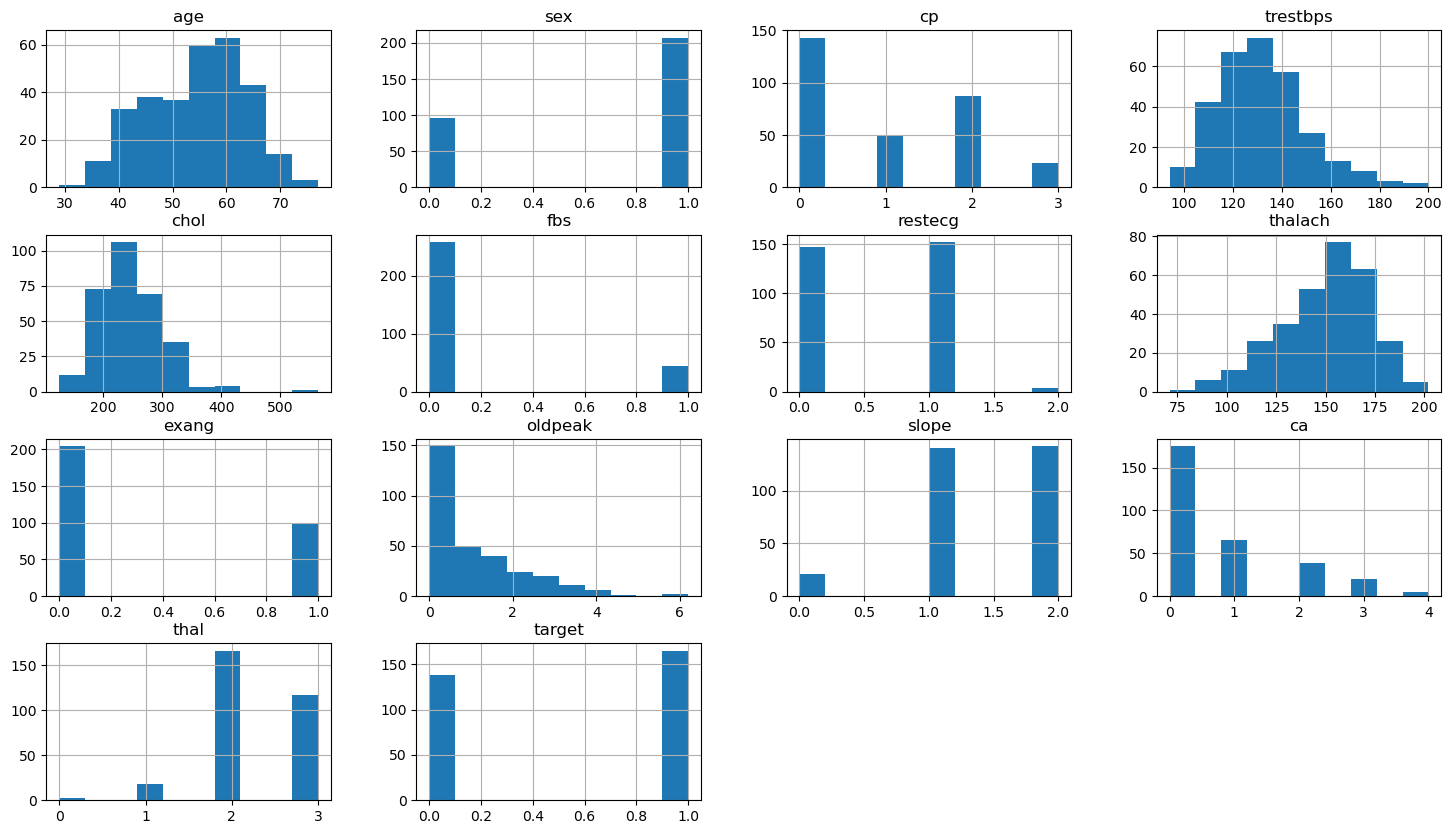

In [6]:
# univariate aanlysis of data
df.hist(figsize=(18,10))
plt.show()

## Numerical Variables

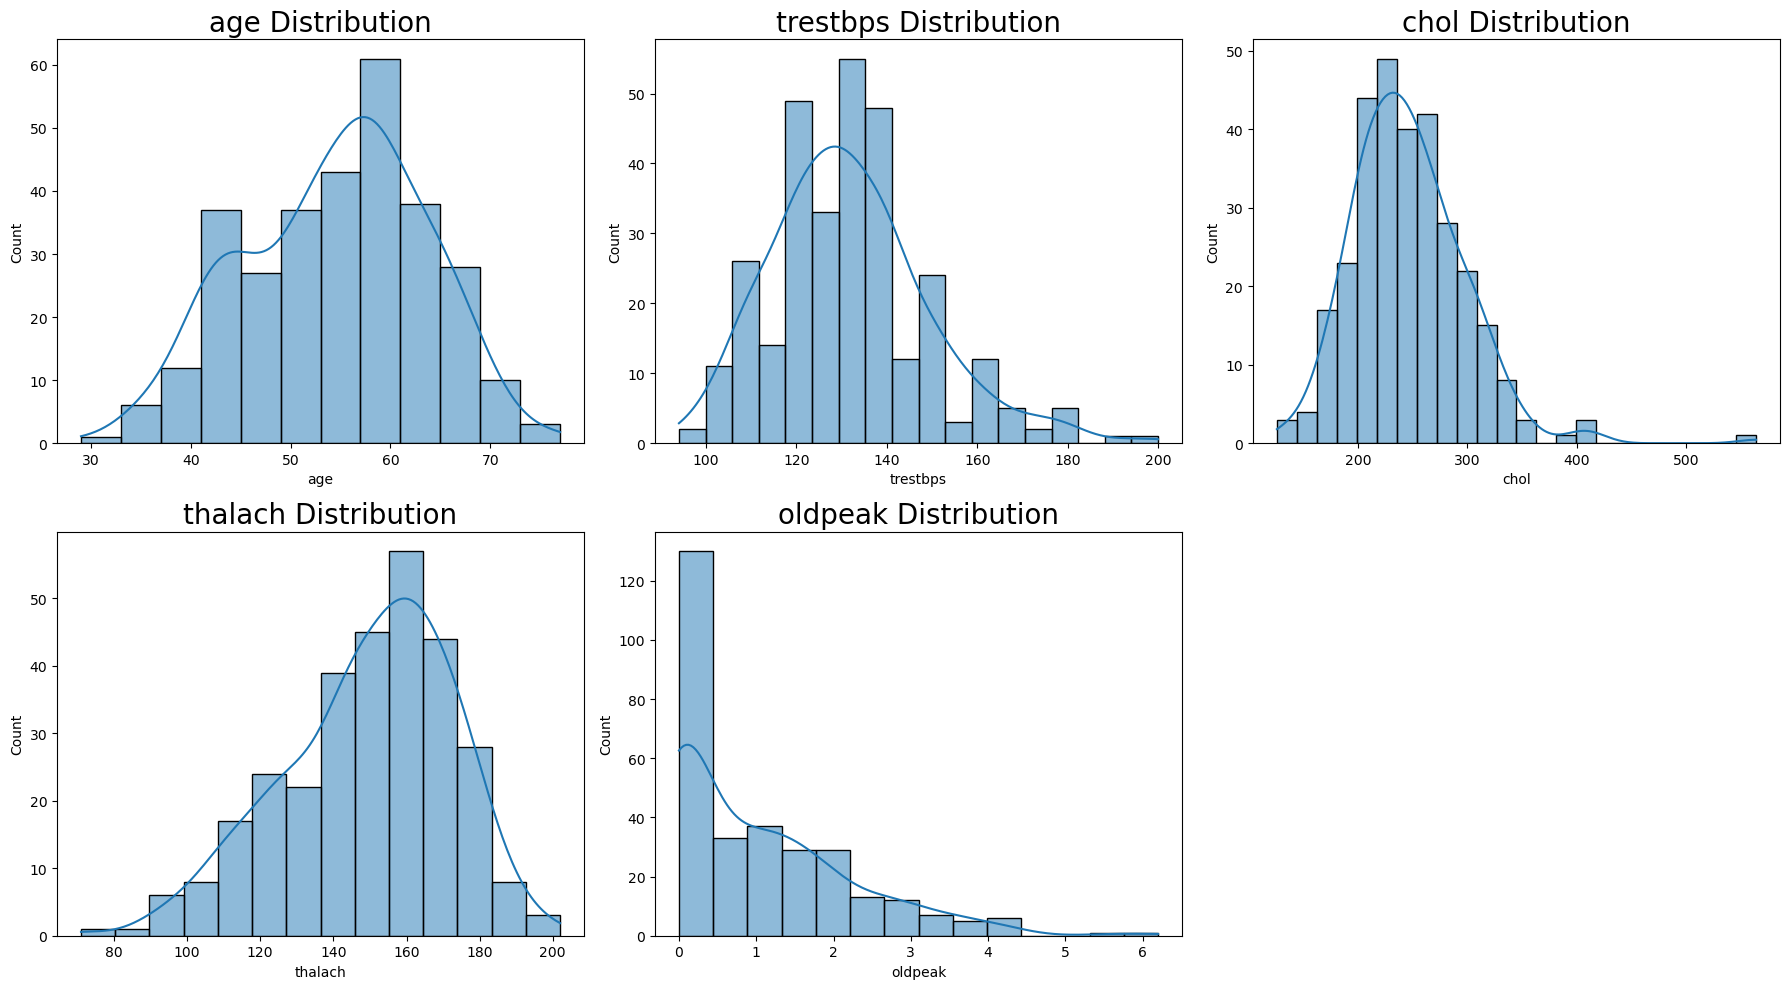

In [8]:
i = 1
plt.figure(figsize = (18,10))
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title('{} Distribution'.format(col), fontsize = 20)
    plt.tight_layout()
    i += 1
plt.show()

## Categorical Variables

In [10]:
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
    print(df[col].value_counts())
    print('----------------------')

sex
1    207
0     96
Name: count, dtype: int64
----------------------
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
----------------------
fbs
0    258
1     45
Name: count, dtype: int64
----------------------
restecg
1    152
0    147
2      4
Name: count, dtype: int64
----------------------
exang
0    204
1     99
Name: count, dtype: int64
----------------------
slope
2    142
1    140
0     21
Name: count, dtype: int64
----------------------
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
----------------------
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
----------------------
target
1    165
0    138
Name: count, dtype: int64
----------------------


## Bivariate Analysis

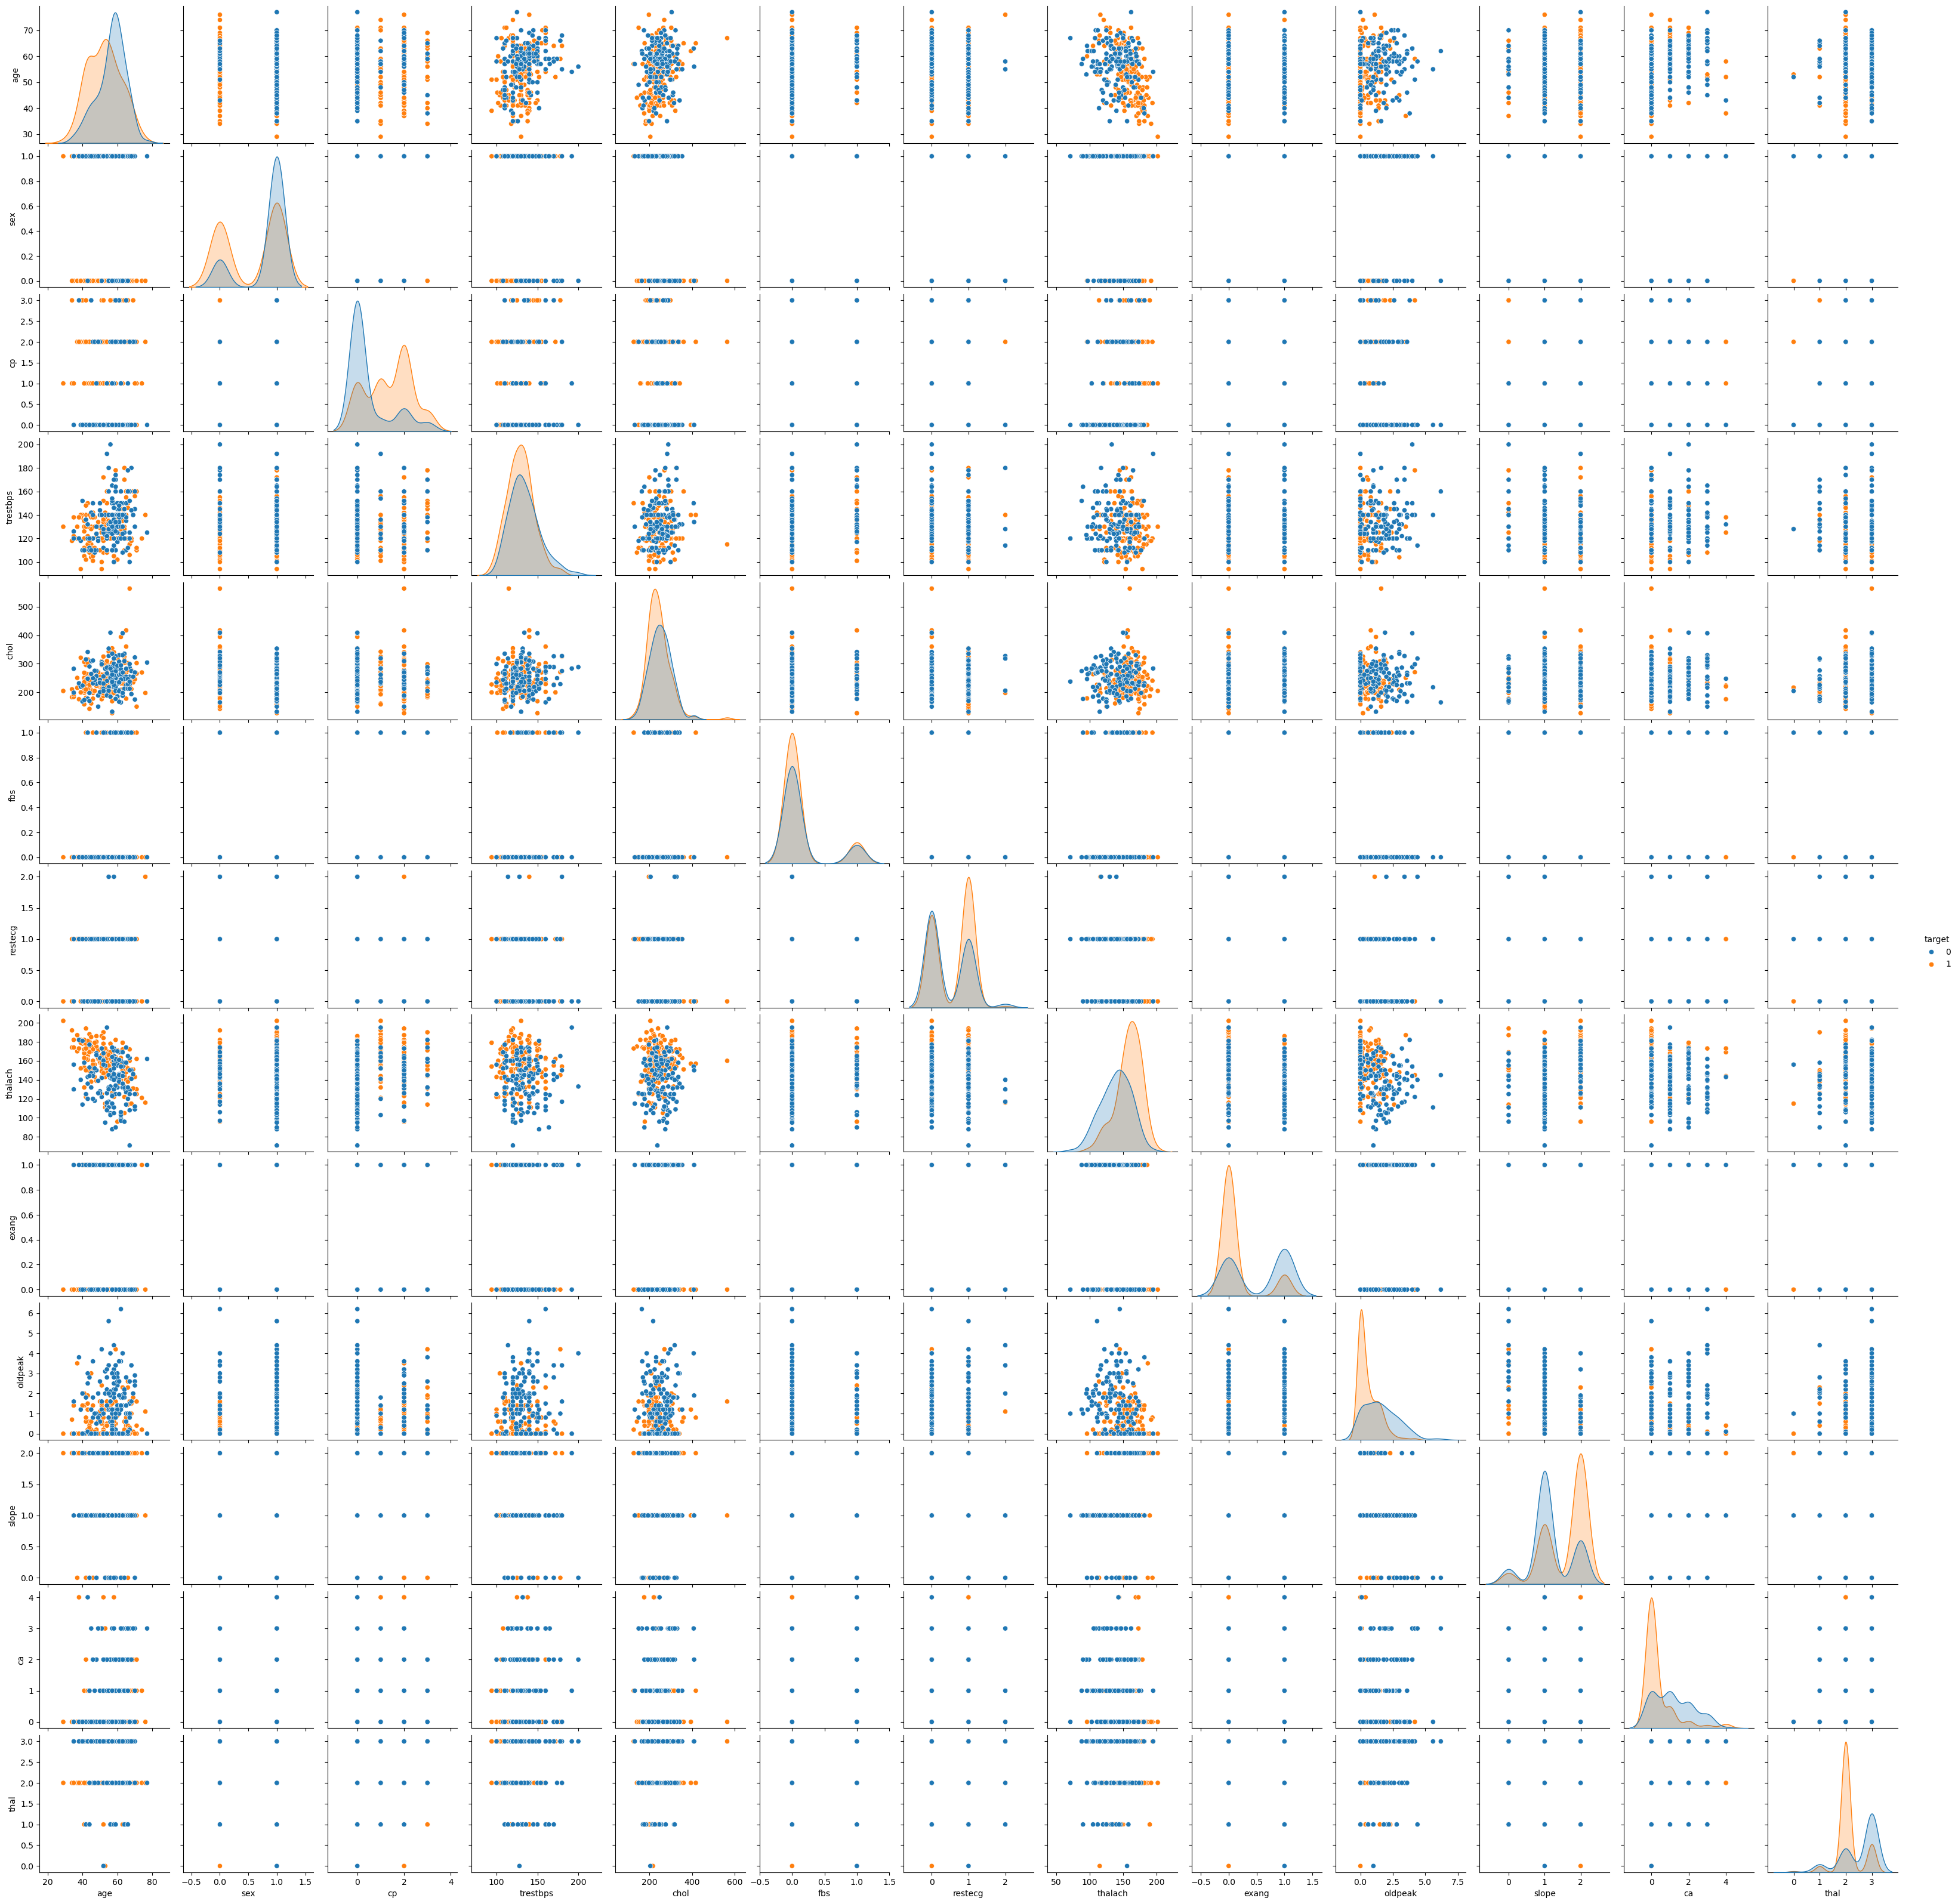

In [12]:
# Bivariate Analysis
ax = sns.pairplot(data=df, hue='target')
plt.show()

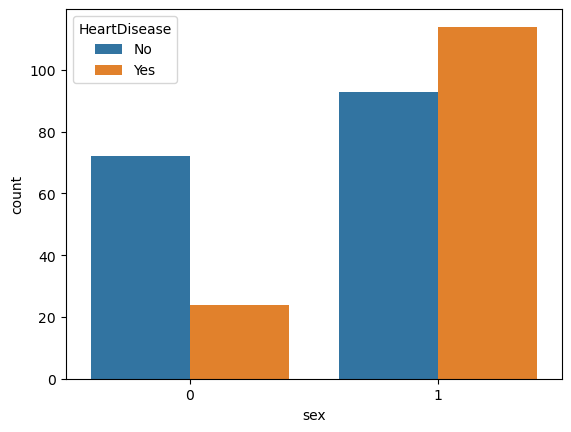

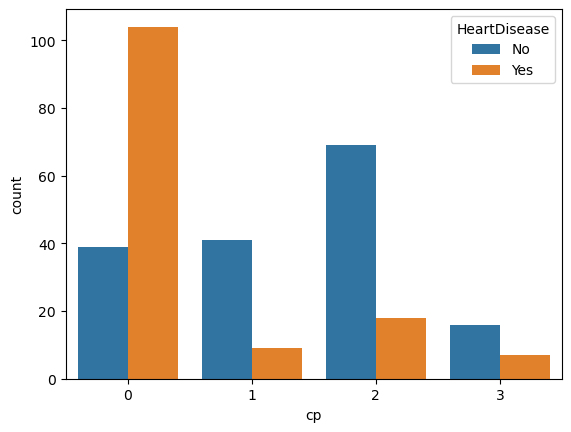

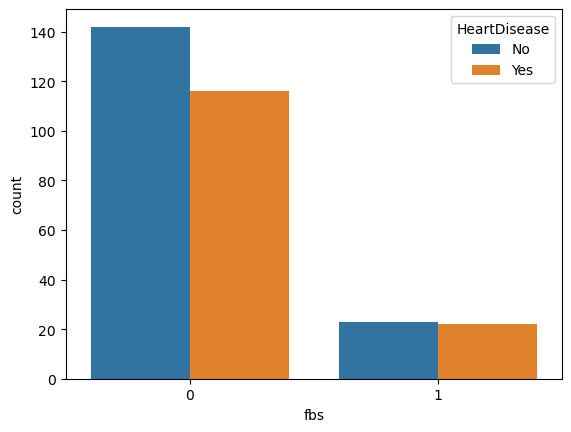

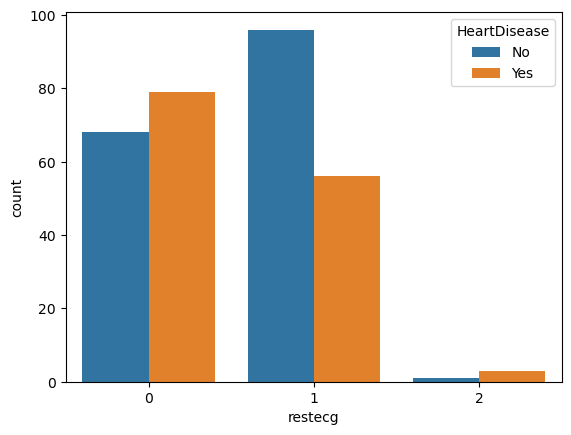

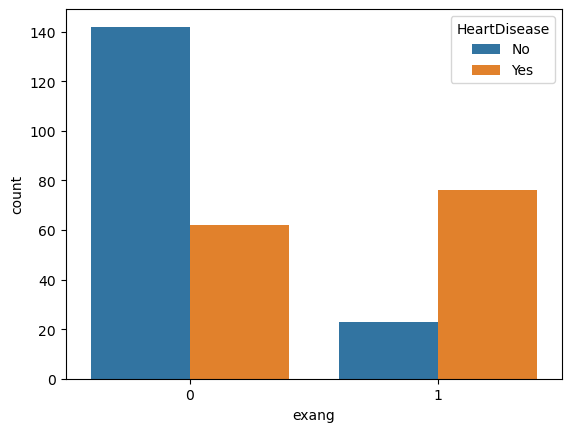

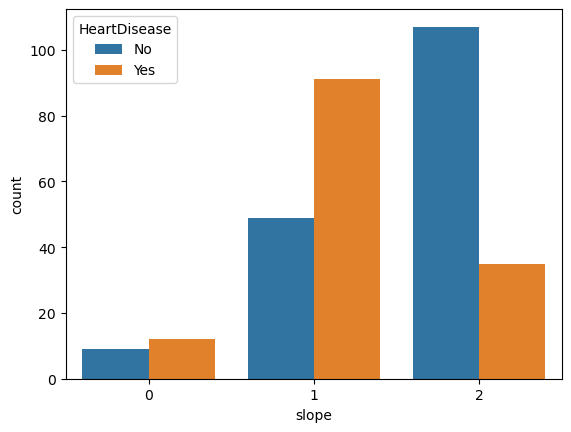

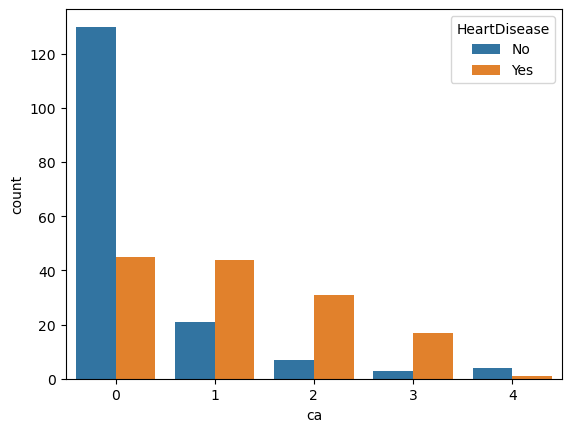

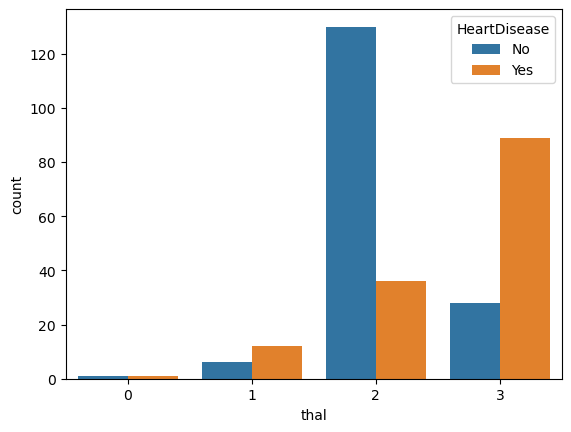

In [14]:
# Bivariate analysis of categorical data
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    ax = sns.countplot(data=df.replace({'target': {0: 'Yes', 1: 'No'}})
                       , x=col, hue='target')
    ax.legend(title='HeartDisease')
    plt.show()

## Outliers Analysis

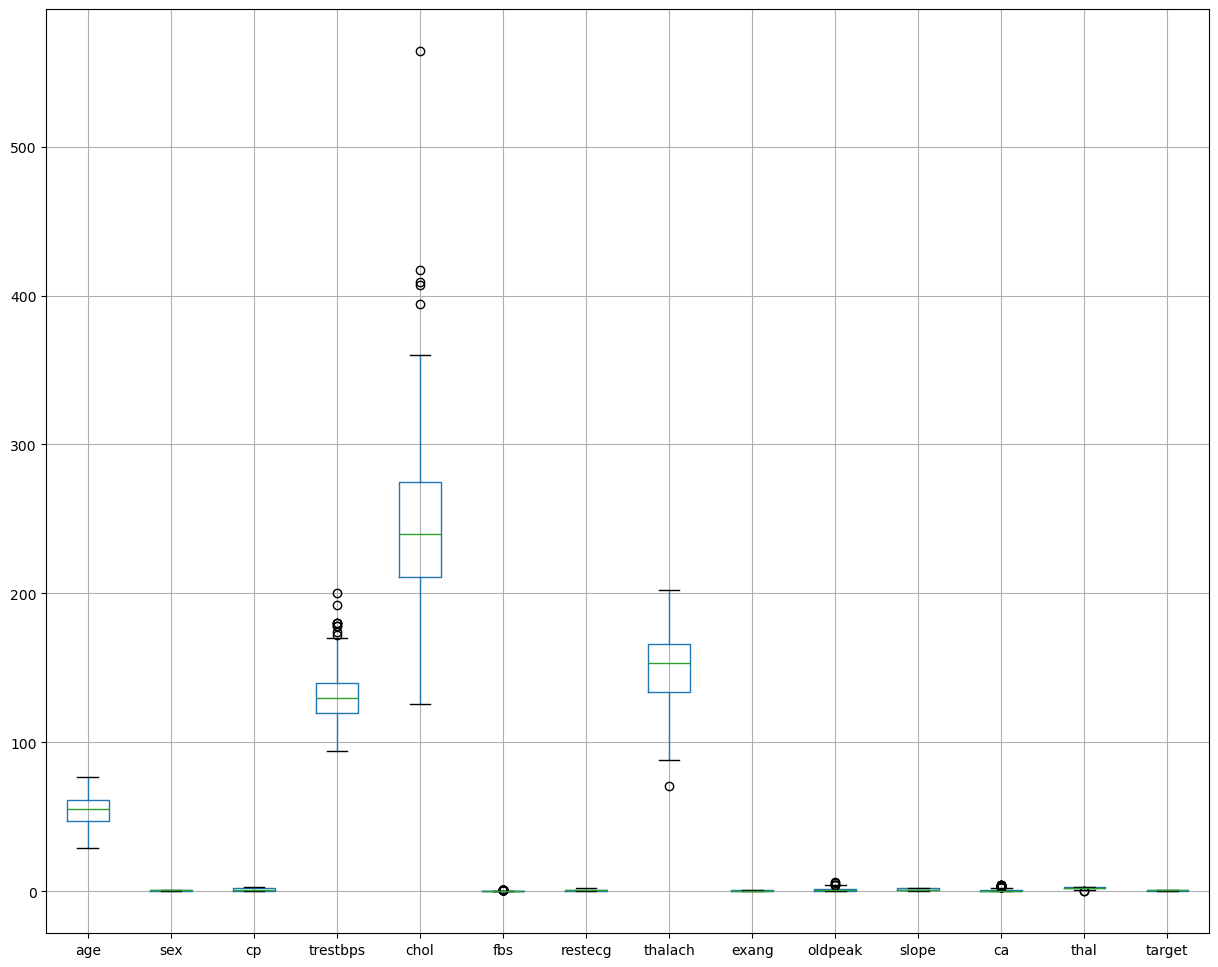

In [23]:
df.boxplot(figsize=(15, 12))
plt.show()

In [24]:
def outliers_lims(col):
    q3, q1 = np.percentile(col, [75, 25])
    iqr = q3-q1
    upper_lims = q3 + 1.5*iqr
    lower_lims = q1 - 1.5*iqr
    return upper_lims, lower_lims

In [25]:
for col in df.columns:
    print('-------------------------------------------')
    print('Columns: ', col)
    UL, LL = outliers_lims(df[col])
    
    print('Under Limit= ', UL)
    print('Lower Limit= ', LL)
    
    total_outliers = len(df.loc[df[col]<LL, col]) + len(df.loc[df[col]>UL, col])
    percentage = (total_outliers/len(df.index)) * 100
    
    print('Percentage of Outliers= ', percentage)
    print('------------------------------------------- \n')

-------------------------------------------
Columns:  age
Under Limit=  81.25
Lower Limit=  27.25
Percentage of Outliers=  0.0
------------------------------------------- 

-------------------------------------------
Columns:  sex
Under Limit=  2.5
Lower Limit=  -1.5
Percentage of Outliers=  0.0
------------------------------------------- 

-------------------------------------------
Columns:  cp
Under Limit=  5.0
Lower Limit=  -3.0
Percentage of Outliers=  0.0
------------------------------------------- 

-------------------------------------------
Columns:  trestbps
Under Limit=  170.0
Lower Limit=  90.0
Percentage of Outliers=  2.9702970297029703
------------------------------------------- 

-------------------------------------------
Columns:  chol
Under Limit=  369.75
Lower Limit=  115.75
Percentage of Outliers=  1.65016501650165
------------------------------------------- 

-------------------------------------------
Columns:  fbs
Under Limit=  0.0
Lower Limit=  0.0
Percentage of

As Above the percentage of Outliers - trestbps - 2.9%, chol - 1.6%, thalach - 0.33%, oldpeak - 1.65%, thal - 0.66% which is low so can be removed  from the dataset

In [28]:
for col in ['trestbps', 'chol', 'thalach', 'oldpeak', 'thal']:
    UL, LL = outliers_lims(df[col])
    df.loc[df[col]<LL, col] = np.nan
    df.loc[df[col]>UL, col] = np.nan

df.dropna(subset=['trestbps', 'chol', 'thalach', 'oldpeak', 'thal'], inplace=True)
df.reset_index(drop=True, inplace=True)

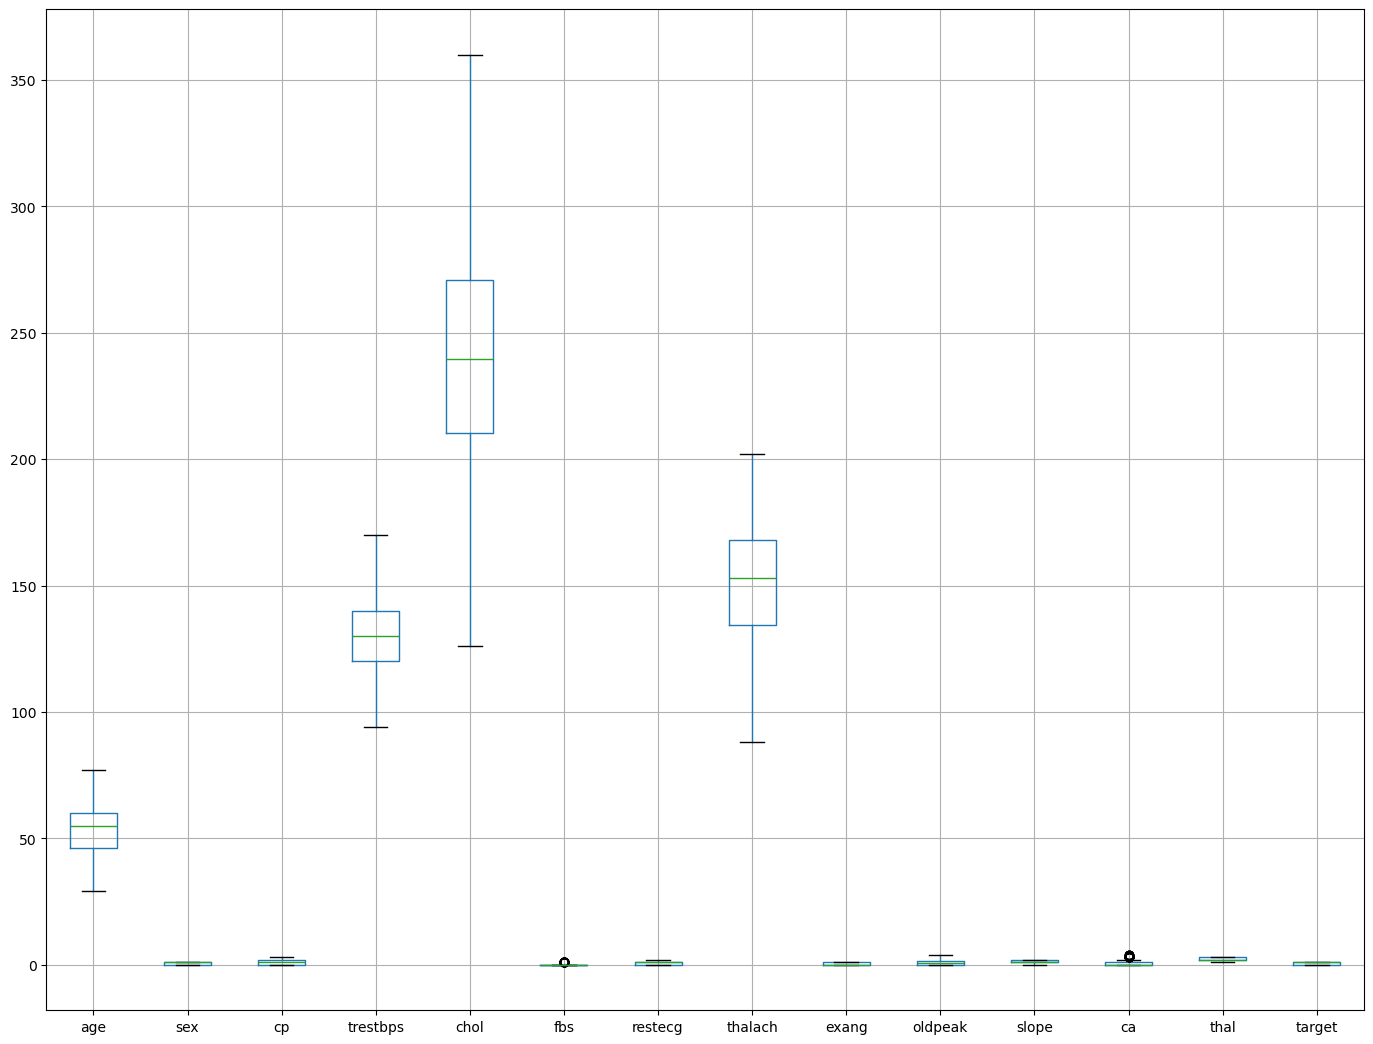

In [29]:
df.boxplot(figsize=(17, 13))
plt.show()

## Correlation

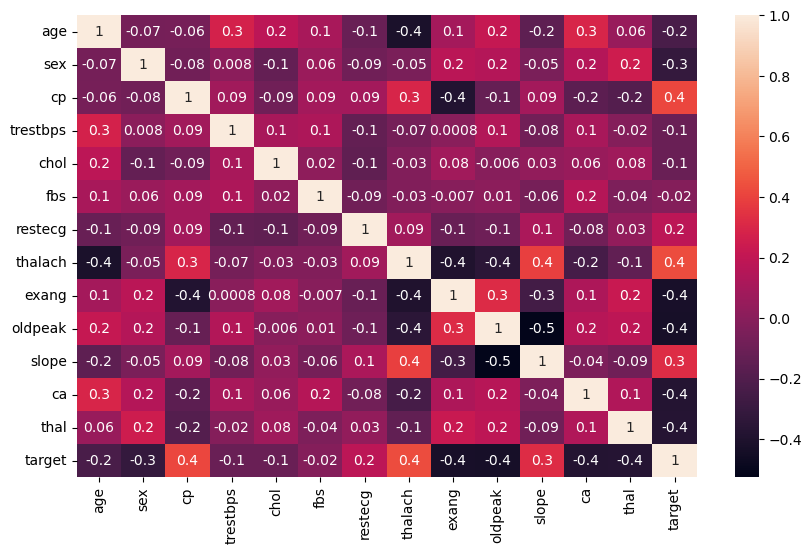

In [31]:
df_corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=df_corr, annot=True, fmt='.1g')
plt.show()

No redundant feature is found in correlation of dataset. so we take take all the feature for further analysis.

## Correlation with target feature

<Axes: title={'center': 'Correlation with target'}>

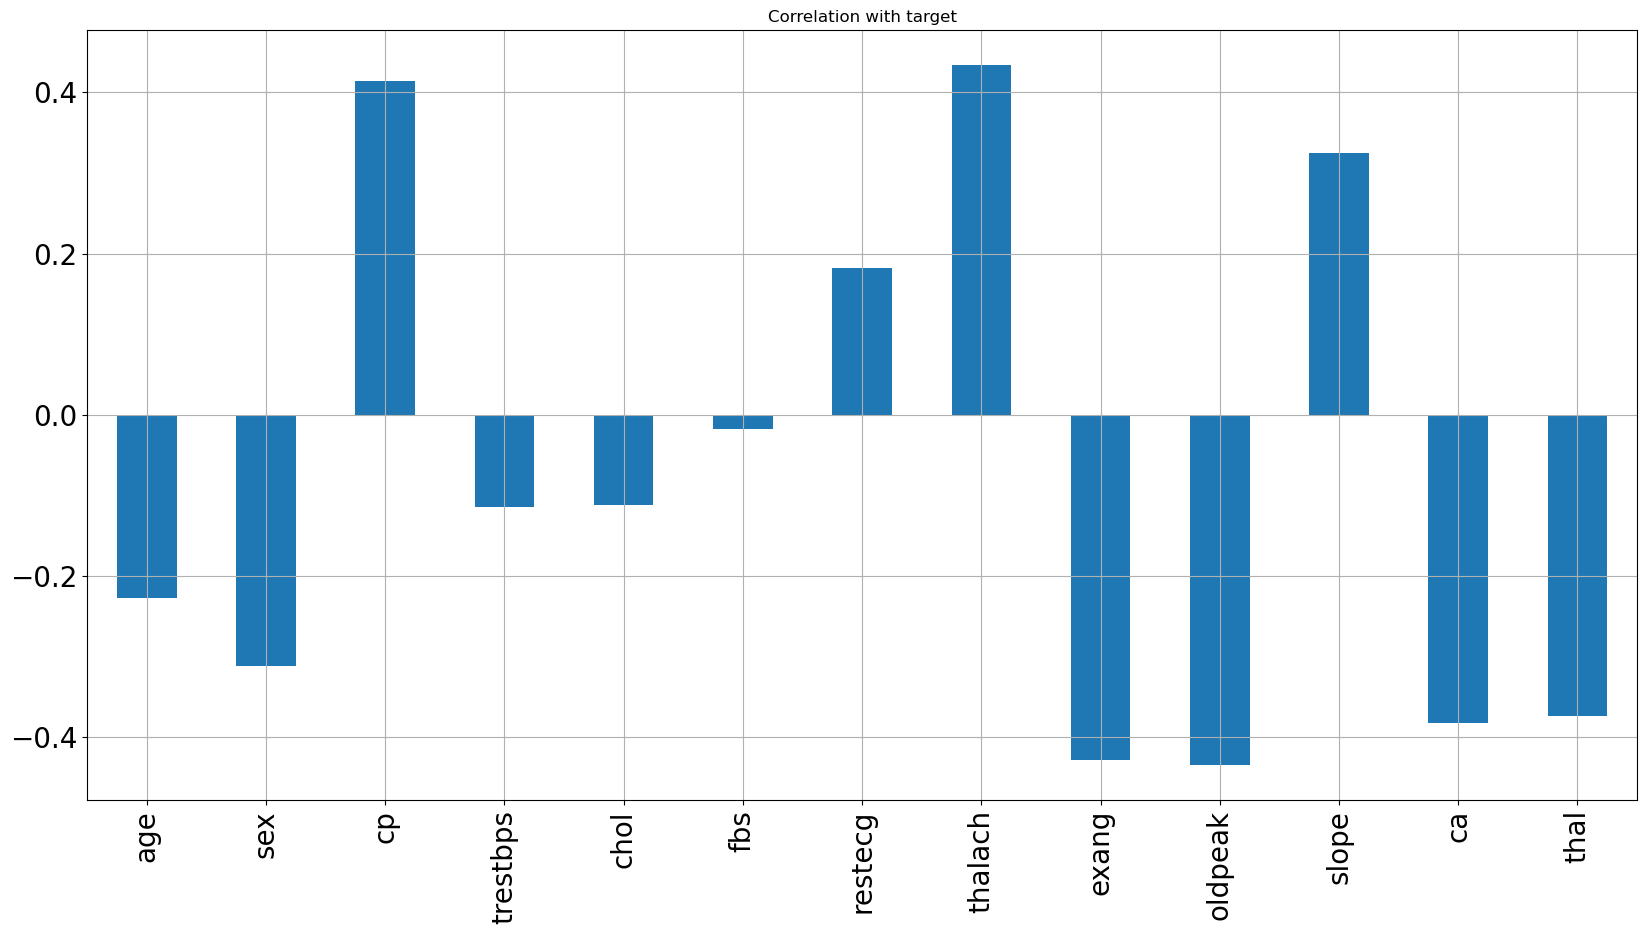

In [34]:
X = df.drop('target', axis = 1)
X.corrwith(df['target']).plot.bar(figsize=(20,10), title='Correlation with target', fontsize = 20, grid=True, rot= 90)

## PCA

In [97]:
feat = df.drop('target', axis=1)
target = df['target']

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_result = pca.fit_transform(feat.values)


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

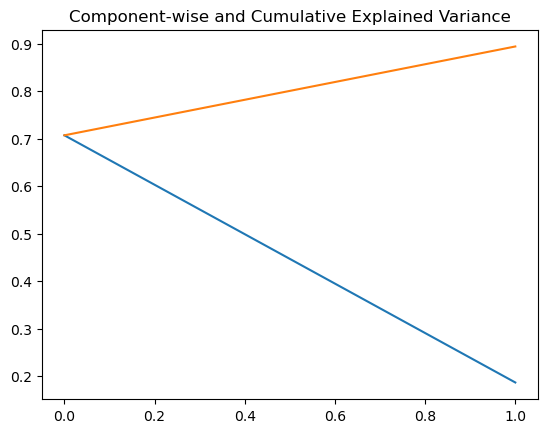

In [101]:
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

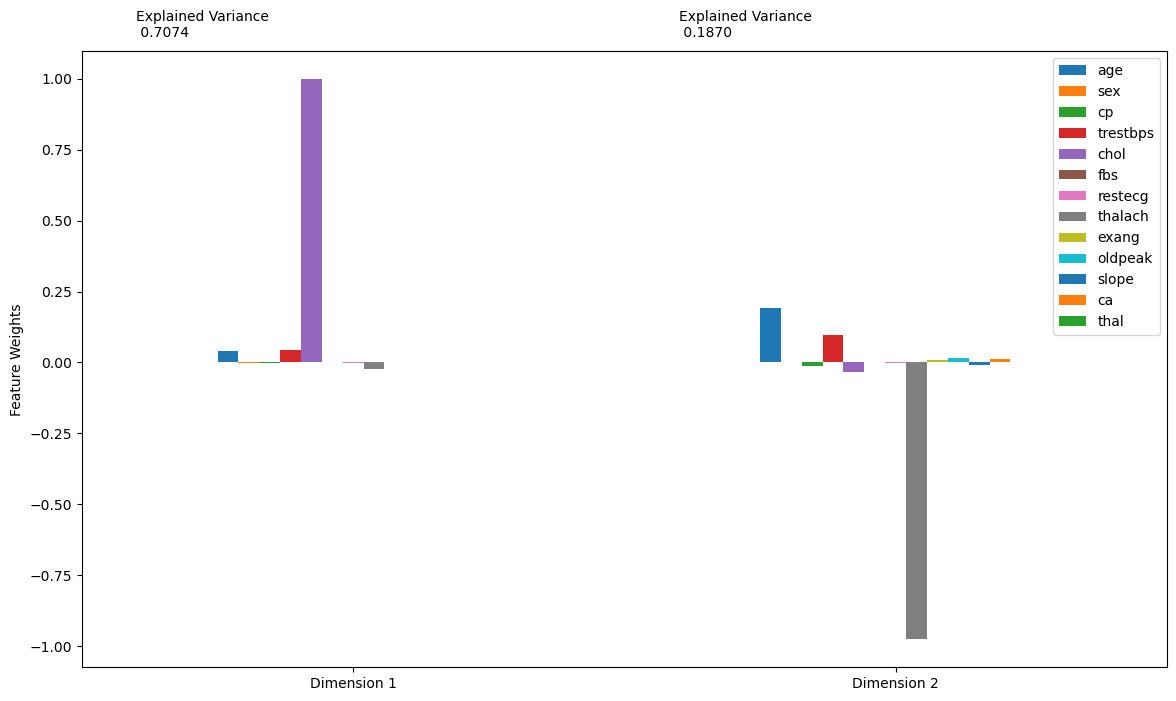

In [103]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))
    
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
        
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)
pca_results = pca_results(feat, pca)

## Conclusion

first dimension : From the above plot it is noticed that the weight is large and positive for chol, while being slightly positive for sex and cp which means that customers who score highly in this component will
have very little dimpact on heart disease whereas people having higher cholestrol have greater chances of heart disease.

Second Dimension: From the above plot it is noticed that the weight is large and negative for thalach and slightly negative for cp,chol and slope, which means that patients who score high in this component will
have very less chances of heart disease. Whereas age and trestbps are moderatively positive.